# Matplotlib 2

Last time we used ```matplotlib```
to draw graphs of functions and smooth curves.

This time we'll draw:

- fractals
- trees

---
## Boolean masks

We'll also do:

- some boolean masks

and we'll start with some number theory.

---

##  Affine transformations

$$\vec{v} \mapsto A.\vec{v} + \vec{b}$$

read [this](https://fr.wikipedia.org/wiki/Application_affine) - it is more complete in [english](https://en.wikipedia.org/wiki/Affine_transformation)


![img](./fern.png)

---

## Exo:

rewrite  the functions below using recursion where 
there is a comment like

```# exo : rewrite me using recursion```

---
## Un peu d'art

http://fichiers.vanlindt.be/Les%20fractales%20dans%20la%20cr%C3%A9ation%20graphique.pdf


In [12]:
! ../.g

[master fee4cb6] web
 2 files changed, 88 insertions(+), 45 deletions(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 1.42 KiB | 69.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   e386b2b..fee4cb6  master -> master


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#using cplx numbers
def plt_cplx(Z, 
             ax=plt, 
             sty='r'):
    X = [z.real for z in Z]
    Y = [z.imag for z in Z] 
    ax.plot(X,Y,sty)

Before we start do you understand how this works ?

---

## Crible d'Ératosthène

Le crible d'Ératosthène est un procédé qui permet de trouver tous les nombres premiers inférieurs à un certain entier naturel donné N. Le crible d'Atkin est plus rapide mais plus complexe.


In [2]:
#https://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n
def primes(n):
    """ Returns  array of primes, 2 <= p < n """
    sieve = np.ones(n, dtype=np.bool)
    sieve[::2] = False
    for i in range(3, int(np.sqrt(n))+1, 2):
        if sieve[i]:
            sieve[i*i::i] = False
    return np.nonzero(sieve)[0][1:]

- nbre premier > 2 => impaire, de la forme : 
    - soit 4k + 1
    - soit 4k + 3
---
we'll use boolean masks to study these:

```P[P % 4 == 1]```
is just like<br>
```[ x for x in P if x % 4 == 1]```<br>
but 
```P % 4 == 1``` is a ```np.array```

it's a [boolean masks](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html).


Watch the end of the  [video](https://machinelearnia.com/numpy/#indexing)
to understand them.

In [361]:
P % 4 == 1, (P % 4 == 1).shape

(array([False,  True, False, ...,  True, False, False]), (78497,))

In [3]:
P = primes(1000000)
X,Y = P[P % 4 == 1], P[P % 4 == 3]

##  Biais de Tchebychev

En mathématiques,
et plus particulièrement en théorie des nombres, 
le biais de Tchebychev est la remarque selon laquelle, la plupart du temps, il y a plus de nombres premiers de la forme 4k + 3 que de la forme 4k + 1. Ce phénomène fut remarqué pour la première fois par Pafnouti Tchebychev en 18531, mais il n'en existe pas encore de démonstration rigoureuse.

[source: wiki](https://fr.wikipedia.org/wiki/Biais_de_Tchebychev)

In [4]:
len(X), len(Y)

(39175, 39322)

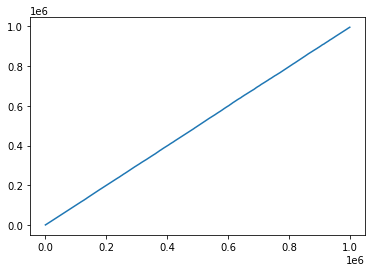

In [5]:
num = min(len(X),len(Y))
X, Y= X[:num],Y[:num]
plt.plot(X[:num],Y[:num]);

In [116]:
from scipy.stats import linregress
linregress(X,Y)

LinregressResult(slope=0.9975682879416617, intercept=-452.5357710691751, rvalue=0.9999978491984912, pvalue=0.0, stderr=1.0453580864150768e-05)

In [12]:
X[X<Y][:3]

array([ 26861, 616841, 616849])

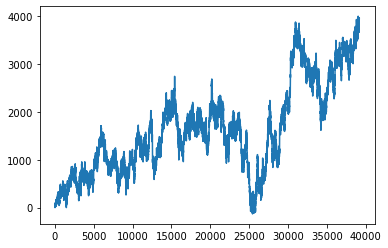

In [6]:
plt.plot(X - Y);

## Exo : verifier

26 861 est le plus petit nombre premier x pour lequel 
- π(x; 4, 1) > π(x; 4, 3) 

— ce qui fut observé par John Leech en 1957 — et le suivant est 616 841

In [318]:
! ../.g

[master 8185663] web
 1 file changed, 74 insertions(+), 23 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 5.69 KiB | 388.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io
   dc0b03a..8185663  master -> master


## Escalier de Cantor

L'escalier de Cantor, ou l'escalier du diable, est le graphe d'une fonction f continue croissante sur $[0, 1]$, telle que f(0) = 0 et f(1) = 1, qui est dérivable presque partout, la dérivée étant presque partout nulle. 

Il s'agit cependant d'une fonction 
- continue
- uniforment continue 
- mais pas absolument continue.

[Source : Wiki](https://fr.wikipedia.org/wiki/Escalier_de_Cantor

---

- On va programmer sa [construction](https://fr.wikipedia.org/wiki/Escalier_de_Cantor#Construction) 
- [voir aussi](https://www-fourier.ujf-grenoble.fr/~mcshane/programming.html).

## Construction

$f = \lim f_n$ : 

- $f_n: [0,1] \rightarrow [0,1]$
- $f_n$ croissante
- $f_n$ [affine par morceau](https://fr.wikipedia.org/wiki/Fonction_affine_par_morceaux)
- ["auto similaire"](https://fr.wikipedia.org/wiki/Autosimilarit%C3%A9)

On va tracer le graphe de $f_n$.
Dans la suite l'array Z contient les points
de discontinuité de $f_n$.

---

## MANDELBROT ET DÉFINITION

### Def : auto-similaire
Une fractale est un objet géométrique **auto-similaire** ou invariant par changement d'échelle : si on zoome sur une partie de la figure, on retrouve la figure entière.
On attribue la découverte des fractales au français Benoît Mandelbrot (1899-1983).

---

En mathématiques, l'ensemble de Mandelbrot est une fractale définie comme l'ensemble des points c du plan complexe pour lesquels la suite de nombres complexes définie par récurrence par :

$$
\begin{cases}
z_0=0\\
z_{n+1}=z_n^2+c
\end{cases}$$
est bornée.

[Discussion mandelbrot set and python](https://github.com/macbuse/just-math/blob/master/mandelbrot.ipynb)

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e3/Benoit_Mandelbrot%2C_TED_2010.jpg" width="300">

---

## Approximations, self similar sets

Let $\phi,\psi : \mathbb{R}^n \rightarrow \mathbb{R}^n $
be affine transformations:

- start with a set $S_0$
- $S_{n+1} = \phi(S_n) \cup \psi(S_{n+1})$
- fractal $ = S_\infty := \lim_{n \rightarrow \infty} S_n$

On a $$\phi(S_\infty) = S_\infty =  \psi(S_\infty)$$.

---
### Example of this construction in 3D:

*En mathématiques, et plus précisément en topologie, la sphère cornue d'Alexander est un célèbre exemple de surface pathologique ; elle fut découverte en 1923 par J. W. Alexander.*

[Source: Wiki](https://fr.wikipedia.org/wiki/Sph%C3%A8re_cornue_d%27Alexander).



 <img src="./horned_sphere.png" width="400">

[Horned Sphere in 3D viewer](https://github.com/macbuse/horned-sphere/blob/master/alexanderSphere2019.stl)






In [13]:
def showGph(pts, 
            ax=plt):
    xs,ys = zip(*pts) #this transposes the array
    ax.plot(xs, ys)

#transformations affine
def L(pts):
    return [ (x/3.0, y/2.0) for x,y in pts]
    
def R(pts):
    return [ (x/3.0 + 2./3, y/2.0 + .5) 
                for x,y in pts]

# draw the graph
def staircase(d):
    # exo : rewrite me using recursion
    S_n = [(0,0),(1,1)]
    for i in range(d):
        # f(S_n) U g(S_n)
        S_n = L(S_n) + R(S_n)
    return S_n

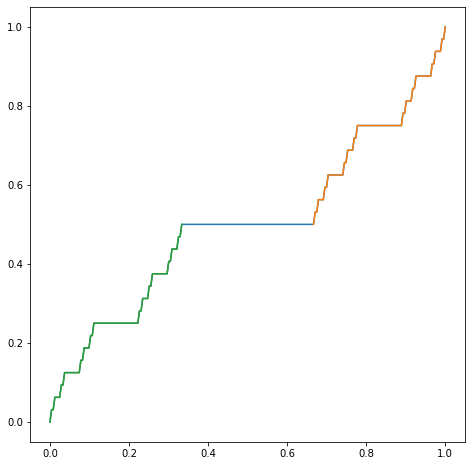

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_aspect('equal')

Z = staircase(5)
showGph(Z,ax=ax)
showGph(Z[-32:],ax=ax)
showGph(Z[:32], ax=ax)

## Derivative

the function is piecewise linear and 
we can  easilcalculate the derivative y using ```numpy```


In [5]:
Z = np.array(Z)
diffs = Z[1:] - Z[:-1]
x_delta, y_delta = diffs[:,0], diffs[:,1]
y_delta/x_delta

array([7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375,
       0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     ,
       7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375,
       0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     ,
       7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375,
       0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     ,
       7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375,
       0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     ,
       7.59375, 0.     , 7.59375, 0.     , 7.59375, 0.     , 7.59375])

La fonction continue qui a pour graphe l'escalier du diable n'est pas absolument continue : l'image de l'ensemble de Cantor, qui est de **mesure nulle**, est $[0,1]$ tout entier.

[à lire](https://fr.wikipedia.org/wiki/Absolue_continuit%C3%A9#Exemples_et_contre-exemples)



In [6]:
slopes = []
for k in range(8):
    Z = staircase(k)
    Z = np.array(Z)
    diffs = Z[1:] - Z[:-1]
    x_delta, y_delta = diffs[:,0], diffs[:,1]
    max_slope = max(y_delta/x_delta)
    print(max_slope)
    slopes.append(max_slope)

1.0
1.5
2.2500000000000013
3.3750000000000053
5.062500000000023
7.59375000000024
11.390625000000359
17.085937500003304


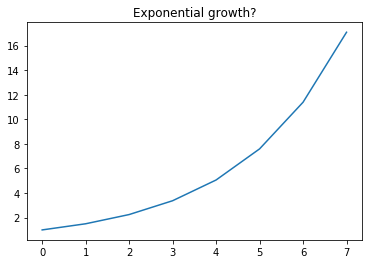

In [219]:
plt.plot(slopes);
plt.title('Exponential growth?');

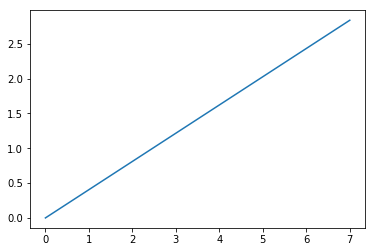

In [203]:
plt.plot(np.log(slopes));

In [204]:
X = np.arange(8)
linregress(np.arange(8), np.log(slopes) )

LinregressResult(slope=0.40546510810818354, intercept=-3.419486915845482e-14, rvalue=1.0, pvalue=2.5000000000000343e-60, stderr=0.0)

## Exo : expliquer ce calcul. 

In [205]:
np.exp(0.40546510810818354)

1.5000000000000286

## Exo : 
Calculer la longueur totale des intervales ou la derivée de l'approximation $f_n' > 0$.


---
## Graph using numpy

In [223]:
M = np.diag([1/3,1/2])
M

array([[0.33333333, 0.        ],
       [0.        , 0.5       ]])

In [224]:
Z = np.ones((2,2))
Z[:,0] = 0
Z

array([[0., 1.],
       [0., 1.]])

In [225]:
# affine transformations
L = np.dot(M,Z)
R = np.dot(M,Z) + np.array([2/3,1/2]).reshape(-1,1)
Z = np.hstack((L,R))

In [226]:
# row vector -> col vector
np.array([2/3,1/2]).reshape(-1,1)

array([[0.66666667],
       [0.5       ]])

In [9]:
def staircase2(d):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    ax.set_aspect('equal')

    M = np.diag([1/3,1/2])
    #first approximation
    Z = np.ones((2,2))
    Z[:,0] = 0
    
    approx = [Z]
    #make d approximations
    for i in range(d):
        #affine transforms
        L = np.dot(M,Z)
        R = np.dot(M,Z) + np.array([2/3,1/2]).reshape(-1,1)
        #put the two together
        Z = np.hstack((L,R))
        approx.append(Z)
        
        ax.plot(Z[0],Z[1])
        
    return approx
        

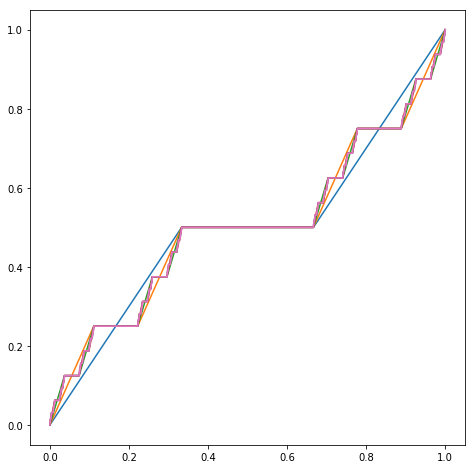

In [10]:
ff = staircase2(7)

## Convergence

we see that
$\sup |f_n - f_{n+1}|$ 
occurs at a pt where $f_n$ isn't differentiable

In [251]:
diffs = []
for k, f in enumerate(ff[:-1]):
    X, Y = f
    #f_n is piecewise linear 
    #so do an interpolation
    #to get values 
    diff = max(np.interp(ff[k+1][0], X, Y) - ff[k+1][1])
    diffs.append(diff)
    print(diff)

0.16666666666666663
0.08333333333333331
0.04166666666666674
0.02083333333333348
0.010416666666666713
0.005208333333333592
0.002604166666667518


## what is the rate of convergence ?


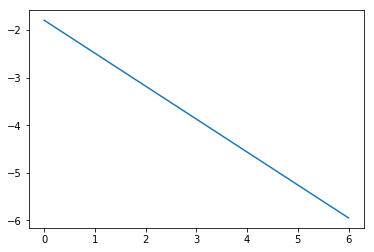

In [253]:
plt.plot(np.log(diffs));

---

## Flocon de Koch

Le flocon de Koch est l'une des premières courbes fractales à avoir été décrites <br>
(bien avant l'invention du terme « fractal(e) »).
**LOL**

Elle a été inventée en 1904 par le mathématicien suédois Helge von Koch.

[wiki](https://fr.wikipedia.org/wiki/Flocon_de_Koch)

[Pour savoir plus](https://fr.wikipedia.org/wiki/Flocon_de_Koch#Courbe_de_Koch)



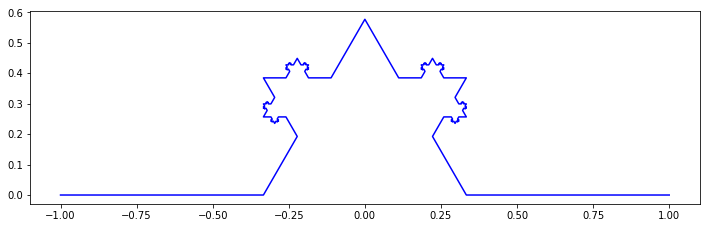

In [131]:
Z = [-1, 1J*np.sqrt(3) , 1]
Z = [-1] + [z/3 for z in Z] + [1]

RR = (Z[-2] - Z[2])/2
CR = (Z[-2] + Z[2])/2

def R(Z):
    return [RR*z + CR for z in Z]
    
RL = (- Z[1] +  Z[2])/2
CL = (Z[1] + Z[2])/2

def L(Z):
    return [RL*z + CL for z in Z]

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.set_aspect('equal')
#plt_cplx(Z)
for i in range(5):
    Z = [-1] + L(Z) + R(Z) + [1]
plt_cplx(Z,ax=ax, sty='b')


## Exo : 
1. Calculer la longueur totale de chaque approximation.
1. Decrire le comportement de la suite des longueurs.


## Animated etc.

https://github.com/macbuse/koch/blob/master/koch.ipynb

---

# Exo

The code in the next cell makes some of the holes in 
[tapis de Sierpiński](https://fr.wikipedia.org/wiki/Tapis_de_Sierpi%C5%84ski)

1. Fix the code so that it makes the tapis.
1. Rewrite it using recursion.
1. Change it to make a [triangle de Sierpiński](https://fr.wikipedia.org/wiki/Triangle_de_Sierpi%C5%84ski).
1. What about [this](https://images.math.cnrs.fr/Decouper-au-laser-son-tapis-de-Sierpinski.html?lang=fr)?
1. Rewrite this using the trick at the end of this notebook.

---

Le tapis de Sierpiński (1916), du nom de Wacław Sierpiński, est une fractale obtenue à partir d'un carré. Le tapis se fabrique en découpant le carré en neuf carrés égaux avec une grille de trois par trois, et en supprimant la pièce centrale, et en appliquant 
cette procédure indéfiniment aux huit carrés restants.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Sierpinski_carpet_5.svg" width="300">

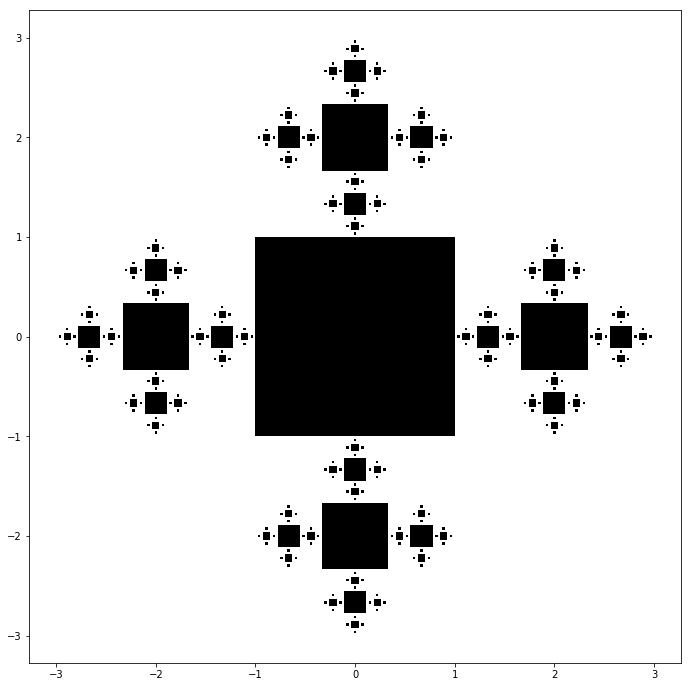

In [321]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.set_aspect('equal')

trans = [[0,2],[0,-2], [2,0], [-2,0]]
trans = np.array(trans)

X = [1,-1,-1, 1]
Y = [1, 1, -1, -1]
motif = np.array([X,Y])

holes = [motif]
for level in range(3):
    # have to use a temporary list
    # otherwise the for loop will not work
    tmp =[]
    for sq in holes:
        # apply affine transformations
        # what happens if I change 3 ?
        tmp.extend([ v.reshape(-1,1) + sq/3
                 for v in trans])
    holes.extend(tmp)

for sq in holes: 
    ax.fill( sq[0], sq[1],'k');

# Un arbre

En informatique, un [arbre binaire](https://fr.wikipedia.org/wiki/Arbre_binaire#:~:text=En%20informatique%2C%20un%20arbre%20binaire,n%C5%93ud%20initial%20%C3%A9tant%20appel%C3%A9%20racine.)
est une structure de données qui peut se représenter sous la forme d'une hiérarchie dont chaque élément est appelé nœud, le nœud initial étant appelé racine. Dans un arbre binaire, chaque élément possède au plus deux éléments fils au niveau inférieur, habituellement appelés gauche et droit. Du point de vue de ces éléments fils, l'élément dont ils sont issus au niveau supérieur est appelé père.


For to make things neater I'll use 
- ```map``` to [avoid loops](https://realpython.com/python-map-function/)
- ```lambda``` to [create temporary functions](https://medium.com/better-programming/lambda-map-and-filter-in-python-4935f248593)


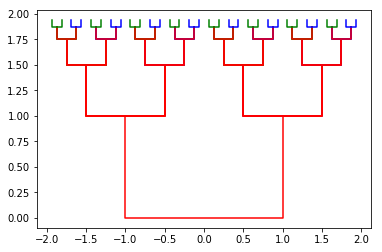

In [172]:
tree = [np.array([-1+1J, -1, 1, 1+1J ])]

for k in range(4):
    
    RB = list(map(lambda z: z/2 -1+1J, tree))
    LB = list(map(lambda z: z/2 +1+1J, tree))
    tree = tree + RB + LB
    
cols = 'rgb'
for k, edge in enumerate(tree):
    plt_cplx(edge, sty=cols[k%3])

## Exo : explain the colors

# Exemples d'arbres  1

## Arbre de Stern-Brocot

En mathématiques, [l'arbre de Stern-Brocot](https://fr.wikipedia.org/wiki/Arbre_de_Stern-Brocot) est une représentation de tous les rationnels strictement positifs, sous forme de fractions irréductibles.

Il a été découvert presque simultanément par le mathématicien allemand Moritz Stern (1858) et par l'horloger français Achille Brocot (1861).

## Énumération des rationnels

La propriété fondamentale de l'arbre de Stern-Brocot est qu'il contient toutes les fractions irréductibles strictement positives une et une seule fois chacune. On en déduit un procédé pour numéroter tous les rationnels positifs, c'est-à-dire une bijection des rationnels positifs sur les entiers naturels positifs. En bref on associe à un rationnel l'entier dont la représentation en base 2 code le chemin de la racine de l'arbre au rationnel choisi.

**Source : Wiki**


# Exemples d'arbres  2

##  Suites de Farey

En mathématiques, [la suite de Farey](https://fr.wikipedia.org/wiki/Suite_de_Farey)
d'ordre n est la suite des fractions irréductibles comprises entre 0 et 1, ordonnées en croissant et dont le dénominateur est inférieur ou égal à n. Certains auteurs ne restreignent pas les suites de Farey à l'intervalle de 0 à 1.

Chaque suite de Farey commence avec la valeur 0, décrite par la fraction 0/1, et finit avec la valeur 1, décrite par la fraction 1/1 (bien que certains auteurs omettent ces termes). Une suite de Farey est quelquefois appelée série de Farey, ce qui n'est pas véritablement correct, les termes n'étant pas additionnés.

---

Écrire une fonction Python ```inseremedians``` qui prend comme argument une liste de couples d’entiers  et renvoit la liste de couples où, comme décrit ci-dessus, $m_i$ est le médian de $c_i$ et $c_{i+1}$. 

[Source : TP](https://www.normalesup.org/~glafon/eiffel16/TPnotecor.pdf)

En déduire une fonction Farey(n) qui prend comme argument un entier n et renvoit la suite de
Farey $F_n$.

---

## Solution ?

I'm going to study the problem below and give a solution

---

[This is interesting](https://hal.archives-ouvertes.fr/hal-00765981/document)

In [211]:
rats = np.array([[0,1], [1,1]])
rats

array([[0, 1],
       [1, 1]])

the median is

In [212]:
rats[:-1] + rats[1:]

array([[1, 2]])

in numpy we can do the insertion using indices like this

In [213]:
tmp = np.zeros((2*rats.shape[0]-1,2))
tmp[::2,] = rats
tmp[1::2,] = rats[:-1] + rats[1:]
tmp

array([[0., 1.],
       [1., 2.],
       [1., 1.]])

## The function  using numpy

Compare with [this](https://fr.wikipedia.org/wiki/Suite_de_Farey#Un_algorithme_simple)

In [217]:
def Farey(n):
    rats = np.array([[0,1], [1,1]])
    for k in range(n-1):
        tmp = np.zeros((2*rats.shape[0]-1, 2))
        tmp[::2,] = rats
        tmp[1::2,] = rats[:-1] + rats[1:]
        rats = tmp
    return rats

Farey(3)
    

array([[0., 1.],
       [1., 3.],
       [1., 2.],
       [2., 3.],
       [1., 1.]])

In [219]:
rats = Farey(4)
nums, denoms = rats[:,0], rats[:,1]
nums

array([0., 1., 1., 2., 1., 3., 2., 3., 1.])

## Visualising the tree structure 

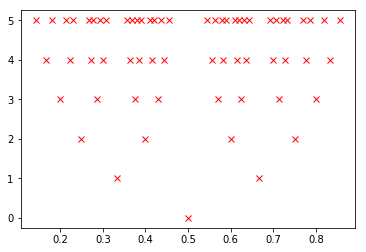

In [3]:
rats = np.array([[0,1], [1,1]])
for k in range(6):
    tmp = np.zeros((2*rats.shape[0]-1,2))
    tmp[::2,] = rats
    tmp[1::2,] = rats[:-1] + rats[1:]
    #fracs = rats[:,0]/rats[:,1]
    fracs = tmp[1::2,0]/tmp[1::2,1]
    plt.plot(fracs, k*np.ones_like(fracs), 'rx')
    rats = tmp

In [229]:
len(rats)

65

In [232]:
rats[::2][:10]

array([[ 0.,  1.],
       [ 1.,  6.],
       [ 1.,  5.],
       [ 2.,  9.],
       [ 1.,  4.],
       [ 3., 11.],
       [ 2.,  7.],
       [ 3., 10.],
       [ 1.,  3.],
       [ 4., 11.]])

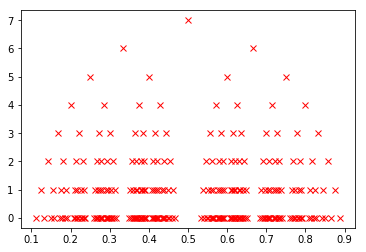

In [359]:
tmp = np.copy(rats)
k = 0
while tmp.shape[0] > 2:
    fracs = tmp[1::2,0]/tmp[1::2,1]
    plt.plot(fracs, k*np.ones_like(fracs), 'rx')
    tmp = tmp[::2]
    k += 1
    

##  Recursion

If one looks carefully one sees 
that the k-th element of $F_n$
is just the 2k-th element of $F_{n+1}$


$$(F_{n+1})_{2k} = (F_n)_k $$

$$(F_{n+1})_{2k+1} = (F_n)_k  + (F_n)_{k+1}$$


In [14]:
def F(n):
    if n == 0:
         return np.array([[0,1], [1,1]])
    #F_n-1 is not a valid variable name
    F_n_1 = F(n-1)
    F_n = np.zeros((2*F_n_1.shape[0]-1,2))
    F_n[::2,] = F_n_1
    F_n[1::2,] = F_n_1[:-1] + F_n_1[1:]
    return F_n

In [212]:
F(2)

array([[0., 1.],
       [1., 3.],
       [1., 2.],
       [2., 3.],
       [1., 1.]])

## Conjecture 

[Tirée dans le TP](https://www.normalesup.org/~glafon/eiffel16/TPnote.pdf)

*On fait la conjecture suivante : dans la suite de Farey $F_n$, <br>
les valeurs prises par la fonction evalue
sur chacun  <br>des couples de la suite sont strictement croissantes:*

$$(F_n)_k < (F_n)_{k+1}$$




In [25]:
F_n = F(4)
fracs = F_n[:,0]/F_n[:,1]

In [26]:
diffs = fracs[1:] - fracs[:-1] 
diffs

array([0.2       , 0.05      , 0.03571429, 0.04761905, 0.04166667,
       0.025     , 0.02857143, 0.07142857, 0.07142857, 0.02857143,
       0.025     , 0.04166667, 0.04761905, 0.03571429, 0.05      ,
       0.2       ])

## check no values < 0

In [27]:
diffs[diffs < 0 ]

array([], dtype=float64)

In [24]:
diffs[diffs > 0 ]

array([0.2       , 0.05      , 0.03571429, 0.04761905, 0.04166667,
       0.025     , 0.02857143, 0.07142857, 0.07142857, 0.02857143,
       0.025     , 0.04166667, 0.04761905, 0.03571429, 0.05      ,
       0.2       ])


- ```diffs < 0```
- ```diffs > 0```

are [boolean masks](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html).

[Regarder la video](https://machinelearnia.com/numpy/#indexing)



#  Exo

[Tirée dans le TP](https://www.normalesup.org/~glafon/eiffel16/TPnote.pdf)

Écrire une fonction Python ```appartient_farey(x,n)``` 
qui détermine si le
nombre flottant x correspond à la valeur evalue($c_i$) pour un des couples d’entiers $c_i$ de la
suite de Farey $F_n$. 

La fonction renverra bien sûr True si c’est le cas, False sinon.

In [64]:

def interval(x, n):
    if n == 0:
        # returning 2 objects
        return np.array([[0,1], [1,1]]), []
    
    tmp, medians = interval(x, n-1)
    median = tmp[0] + tmp[1]
    medians.append(median)
    if median[0]/median[1] < x:
        tmp[0] = median
    else:
        tmp[1] = median
    return tmp, medians

In [57]:
uu, medians = interval((np.sqrt(5) - 1)/2, 8)
uu[:,0]/uu[:,1]

array([0.61764706, 0.61818182])

## Visualizing the solution

In [58]:
medians = np.array(medians)
mfracs = medians[:,0]/medians[:,1] 
mfracs

array([0.5       , 0.66666667, 0.6       , 0.625     , 0.61538462,
       0.61904762, 0.61764706, 0.61818182])

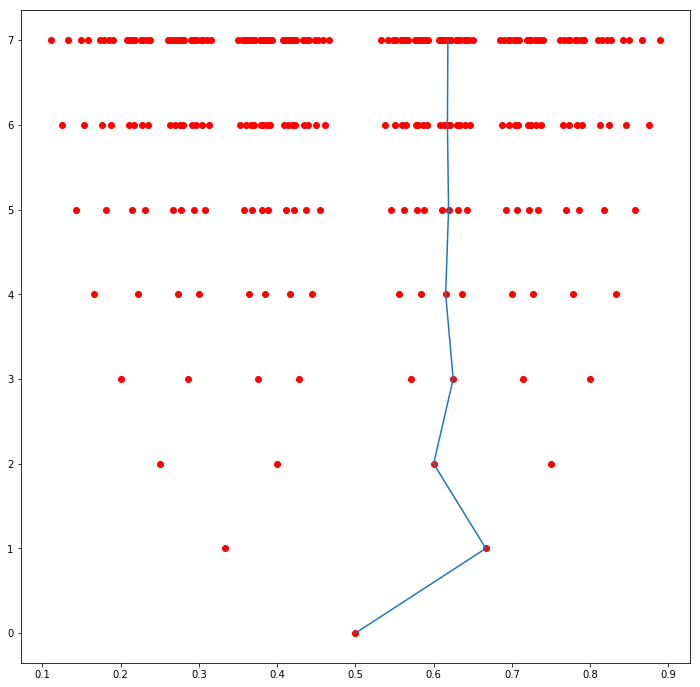

In [366]:

fig, ax = plt.subplots()
fig.set_size_inches(12,12)

rats = np.array([[0,1], [1,1]])
for k in range(8):
    tmp = np.zeros((2*rats.shape[0]-1,2))
    tmp[::2,] = rats
    tmp[1::2,] = rats[:-1] + rats[1:]
    #fracs = rats[:,0]/rats[:,1]
    fracs = tmp[1::2,0]/tmp[1::2,1]
    ax.plot(fracs, k*np.ones_like(fracs), 'ro')
    rats = tmp
    
ax.plot(mfracs, np.arange(len(mfracs)) );

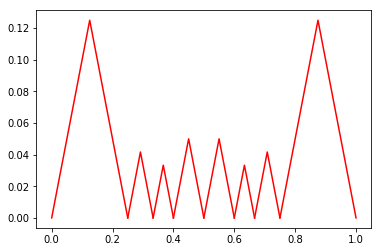

In [15]:
motif = np.array([-.5, .5J,.5])

tt = F(3)
fracs = tt[:,0]/tt[:,1]
diams = fracs[1:] - fracs[:-1] 
centres = .5*(fracs[1:] + fracs[:-1])

circles = [d*motif + c for c,d in zip(centres,diams)]
for cc in circles:
    plt_cplx(cc)   


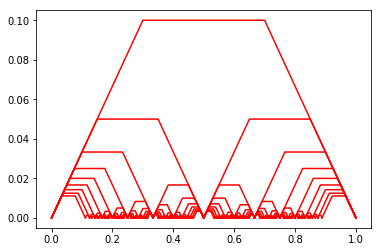

In [214]:
C = np.array([-.5, -.2+.1J, .2+.1J, .5])

F_n = F(8)
#this should be a while loop
#but I hate doing k += 1
for k in range(2**10):
    fracs = F_n[:,0]/F_n[:,1]
    
    diams = fracs[1:] - fracs[:-1] 
    centres = .5*(fracs[1:] + fracs[:-1])
    circles = [d*C + c for c,d in zip(centres, diams)]
    
    for cc in circles:
        plt_cplx(cc)
        
    F_n = F_n[::2]
    if F_n.shape[0] < 2: break


## Exo : 

- make the code cleaner using ```np.diff```

- change the array ```C``` above and make something like this
<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Farey_diagram_horizontal_arc_9.svg"
     width = "600">
 - draw the [cercles de Ford](https://fr.wikipedia.org/wiki/Suite_de_Farey#Cercles_de_Ford)

--- 

## Finally a trick (astuce)

We can represent an affine transformation
of $\mathbb{R}^n$
by an $(n+1) \times (n+1)$ matrix <br>
so that transformation  composition is matrix multiplication.

In fact this is what happens:

- in [PS files](https://scientificgems.wordpress.com/2014/11/28/mathematics-in-action-affine-transformations-and-postscript/)

- in [game engines](https://docs.unity3d.com/ScriptReference/Matrix4x4.html)

- on the GPU 
[etc](http://graphics.cs.cmu.edu/nsp/course/15-462/Spring04/slides/04-transform.pdf)



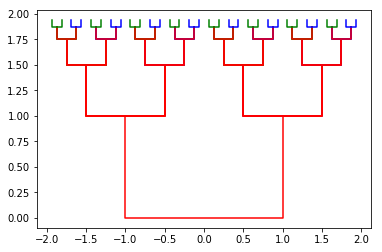

In [349]:
tree = [np.array([-1+1J, -1, 1, 1+1J ])]

for k in range(4):
    
    RB = list(map(lambda z: z/2 -1+1J, tree))
    LB = list(map(lambda z: z/2 +1+1J, tree))
    tree = tree + RB + LB
    
cols = 'rgb'
for k, edge in enumerate(tree):
    plt_cplx(edge, sty=cols[k%3])

In [104]:
branch = np.array([-1+1J, -1, 1, 1+1J ])

scale = .5
L = np.array( [[scale, branch[0] ], [0, 1]])
R = np.array( [[scale, branch[-1] ], [0, 1]])


## Composition = matrix multiplication

In [3]:
np.dot(L,R)

array([[ 0.25+0.j , -0.5 +1.5j],
       [ 0.  +0.j ,  1.  +0.j ]])

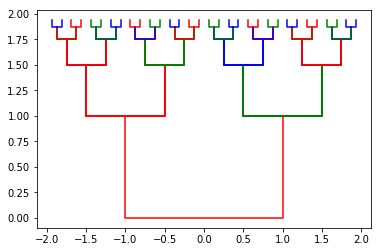

In [105]:
trans = [np.identity(2)]
depth = 4
for k in range(depth):
    # store transformations not points
    trans.extend( [np.dot(M,G) 
                        for M in trans
                        for G in [L,R]])
cols = 'rgb'
shape = branch
for k, f in enumerate(trans):
    scale, cx = f[0]
    plt_cplx(scale*shape + cx, sty=cols[k%3])

## but we can do better...

by **vectorizing** the list of complex numbers <br>
so that we can apply the affine transformations 
using **just** multiplication.

In [28]:
branch = np.array([-1+1J, -1, 1, 1+1J ])
branch2 = np.ones((2, len(branch)), 
                  dtype=np.complex)
branch2[0] = branch
np.dot(R, branch2)

array([[0.5+1.5j, 0.5+1.j , 1.5+1.j , 1.5+1.5j],
       [1. +0.j , 1. +0.j , 1. +0.j , 1. +0.j ]])

# The final solution

Here is my complete solution

---

## Exo

1. Pourquoi ```elts``` et ```generators``` ?
1. Rewrite ```mk_transforms``` using recursion.
1. What happens when ```scale1```, ```scale2``` are complex ($.7 \exp(\pm \pi i/2) \in \mathbb{C}$) ?
1. Modify the generators and the motif to make something like

<img src="./fern.png" width="200">

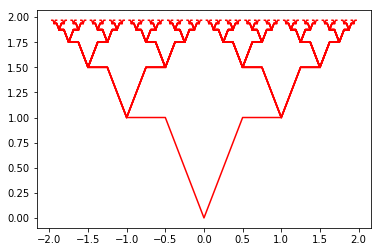

In [21]:
def mk_transforms(generators, depth=4, dim=2):
    
    elts = [np.identity(dim)]   
    for k in range(depth):
        elts.extend( [np.dot(M,G) 
                        for M in elts
                        for G in generators])
    return elts

def cplx2vec(arr):
    vecs = np.ones((2, len(arr)), 
                  dtype=np.complex)
    vecs[0] = arr
    return vecs

motif = np.array([-1+1J, -.5+1J, 0, .5+1J, 1+1J ])
v_motif = cplx2vec(motif)

scale1 = .5
scale2 = .5
L = np.array( [[scale1, motif[0] ], [0, 1]])
R = np.array( [[scale2, motif[-1] ], [0, 1]])
transforms = mk_transforms([L,R], depth=5)

for f in transforms:
    plt_cplx( np.dot(f, v_motif)[0])


In [22]:
scale1 = .7*np.exp( np.pi/2 * 1J)
scale2 = .7*np.exp( -np.pi/2 * 1J)

# Escalier du diable encore

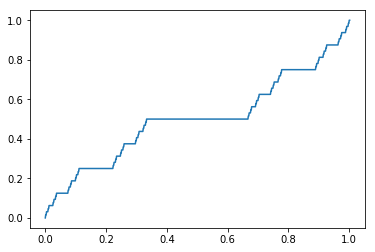

In [23]:
motif = np.array([[0,0,1],[1,1,1], [2,1,1]]).T

L = np.array( [[1/3, 0 ,0], [ 0, 1/2 ,0], [0, 0, 1]])
R = np.copy(L)
R[:2,-1] = np.array([2/3, 1/2])
n = 6
transforms = mk_transforms([L,R], depth=n, dim=3)

pts = np.hstack( [np.dot(f, motif) 
                  for f in transforms[-2**n::]])
X,Y,Z = pts
plt.plot(X,Y);

In [119]:
len(transforms)

27

In [24]:
! ../.g


[master 01831a4] web
 2 files changed, 29 insertions(+), 75 deletions(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 643 bytes | 214.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   aa005cf..01831a4  master -> master
